In [21]:
import pickle

import geopandas
from shapely.geometry import shape

import numpy as np
import rasterio
from pathlib import Path
import matplotlib.pyplot as plt
%matplotlib notebook

In [2]:
! pip install rasterio

# Visualize the geometry

In [3]:
with open("files_metadata.pickle", "rb") as metadata_file:
    products_metadata = pickle.load(metadata_file)        

In [14]:
_gd = {'productId':[], 'geometry':[]}
for p in products_metadata[0:1]:
    _gd['productId'].append(p['productId'])
    _gd['geometry'].append(shape(p['geometry']['geometries'][0]))
    
_gd

{'productId': ['F16_041953_1887_XI_08N120W.tif'],
 'geometry': [<shapely.geometry.polygon.Polygon at 0x7f23f86417f0>]}

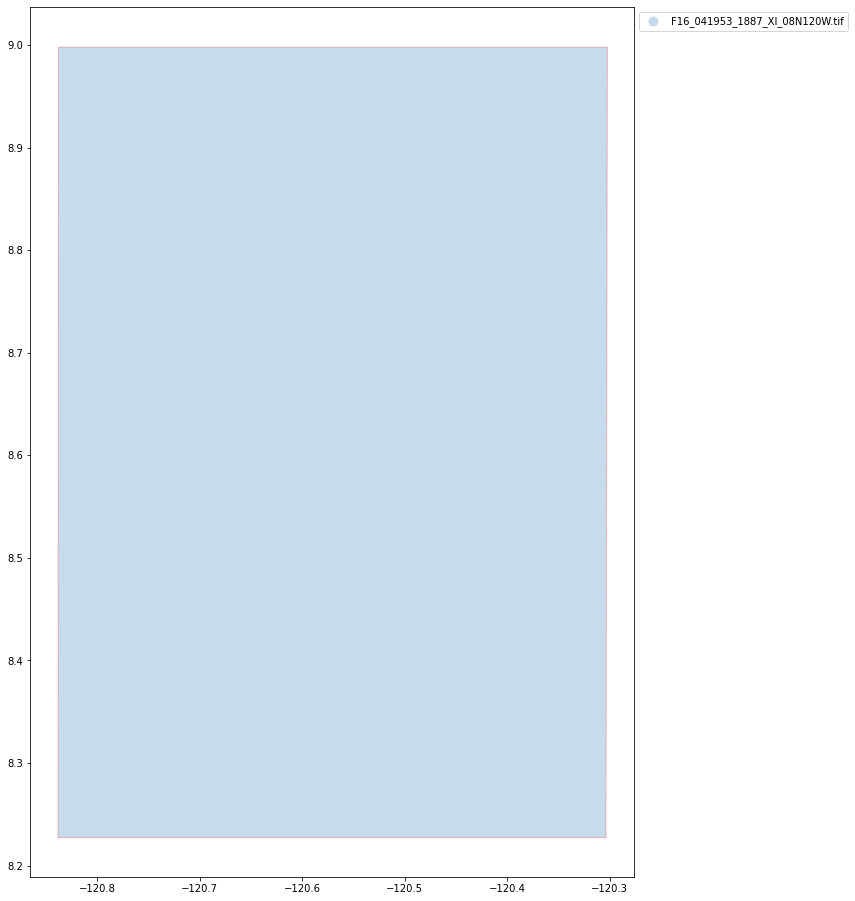

In [15]:
gdf = geopandas.GeoDataFrame(_gd)

gdf.plot(alpha=0.25, edgecolor='red', legend=True, column='productId', 
         legend_kwds={'loc': 'upper left', 'bbox_to_anchor': (1, 1)}, 
         figsize=(24,16));

## Visualize the images

### Unzip it

In [16]:
datapath = Path("/shared_volume/zipped")
datapath_unzipped = Path("/shared_volume/unzipped")

In [17]:
from os import listdir
from os.path import isfile, join
zipped_data_files = [Path(datapath).joinpath(f) for f in listdir(datapath) if isfile(join(datapath, f)) and ".tif.zip" in f]
zipped_data_files[0:6]

[PosixPath('/shared_volume/zipped/F16_042056_1556_XI_24S049W.cal.map.tif.zip'),
 PosixPath('/shared_volume/zipped/F16_042082_1494_XN_30S037W.cal.map.tif.zip'),
 PosixPath('/shared_volume/zipped/F16_042080_1476_XN_32S342W.cal.map.tif.zip'),
 PosixPath('/shared_volume/zipped/F16_042036_1844_XN_04N225W.tif.zip'),
 PosixPath('/shared_volume/zipped/F16_042058_1213_XI_58S097W.cal.map.tif.zip'),
 PosixPath('/shared_volume/zipped/F16_042084_1691_XN_10S095W.cal.map.tif.zip')]

In [18]:
import shutil

In [19]:
def display_image(zipped_data_file, datapath_unzipped):  
    unzipped_datafile = datapath_unzipped.joinpath(zipped_data_file.stem)
    if not unzipped_datafile.exists():
        print(f"Unzipping {zipped_data_file}..")
        shutil.unpack_archive(zipped_data_file, datapath_unzipped)
        print("")
    else:
        print(f"Unzipped file already exists: {unzipped_datafile}")
        
    with rasterio.open(unzipped_datafile) as tif:
        img = tif.read(1)
        img[img<=tif.nodata] = np.nan

    plt.subplots(figsize=(24,16))
    plt.imshow(img, cmap = 'viridis')
    plt.colorbar()            

In [ ]:
display_image(zipped_data_files[0], datapath_unzipped)

Unzipped file already exists: /shared_volume/unzipped/F16_042056_1556_XI_24S049W.cal.map.tif
